## Lecture/Notes/Code-Along

---------
## Case

There is a company which spends money on advertisement for different media channels: TV, radio and newspaper.

## Task:

* suggest marketing plan to increase sales units
* use linear regression to predict sales based on different spendings on different marketing channels
---------
## Initial EDA - Exploratory Data Analysis

The dataset for this lecture comes from ISLR - Introduction to Statistical Learning. The dataset used is Advertising.csv

Units:

* TV, radio, newspaper - thousands dollars
* Sales - thousands units

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/Advertising.csv", index_col=0)

df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [4]:
df.shape # 200 samples, 3 features, 1 label

(200, 4)

3


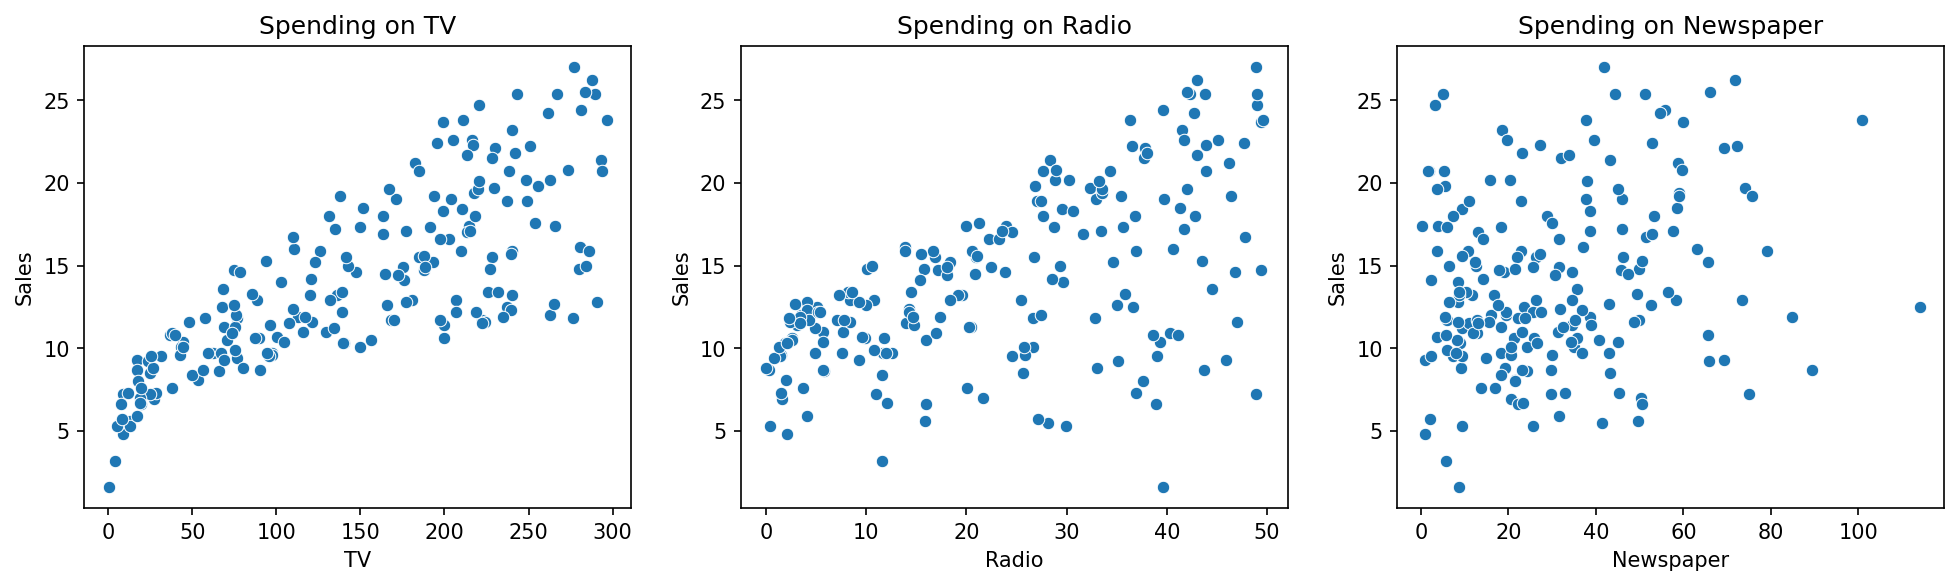

In [5]:
numbers_features = df.shape[1]-1 # Varför? Jo för att man vill kunna skapa olika plottar # Vi plockar 4 - 1 för att vi har 3 features och den 4:e är sales
print(numbers_features)

fig, ax = plt.subplots(1, numbers_features, figsize = (16,4), dpi = 150)  # Dpi är storlek, figsize är för hur stora figurerna och 'boxarna' är.

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x=feature, y="Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

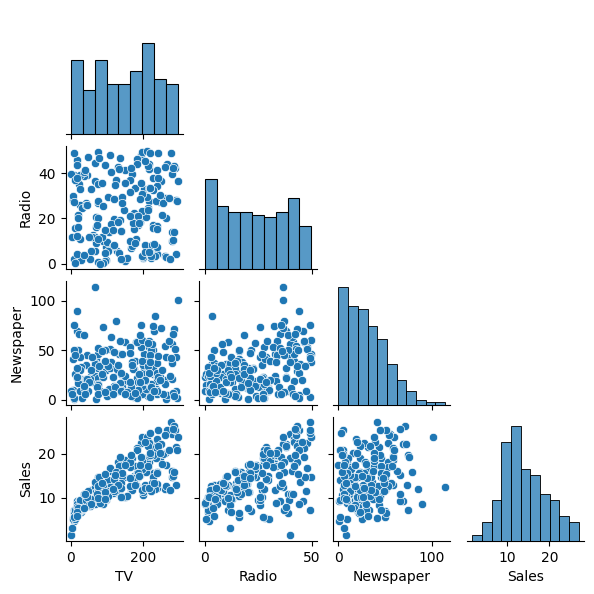

In [6]:
ax = sns.pairplot(df, height = 1.5, corner=True)  # Man kan göra fler explorativa saker. OBS gör inte pairplot när man har fler än 5-6 features

## Simple linear regression

Linear regression is a supervised learning algorithm, the predicted output is continuous. When we have one feature or predictor variable it's called simple linear regression, and with multiple features it's called multiple linear regression. Equation for simple linear regression is:

### y≈β0+β1X

where X
X
 is the predictor variable, y
y
 is the response variable, β0
β
0
 is intercept and β1
β
1
 is slope. β0
β
0
 and β1
β
1
 are unknown parameters that needs to be estimated with the data points (x1,y1),(x2,y2),…,(xn,yn)
(
x
1
,
y
1
)
,
(
x
2
,
y
2
)
,
…
,
(
x
n
,
y
n
)
.

Example:

y
y
 - sales
X
X
 - TV spending as it looks to fit a line more than the others, through visually inspecting the scatterplots
We use the data points to get a sample estimate β̂ 0
β
^
0
, β̂ 1
β
^
1
, by using least squares estimate, which is the most common method. Then we get the prediction of y
y
 as ŷ =β̂ 0+β̂ 1x
y
^
=
β
^
0
+
β
^
1
x
, which is a line that is as close as possible to the data points.

In [7]:
X, y = df['TV'], df['Sales']

X

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [8]:
y  # En annan serie

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [9]:
beta_1, beta_0 = np.polyfit(X, y, deg=1)  # Vi ser att den gör least squares polinomal fit för våra b0 och b1. Degree=1 simple linear regression (OLS)
beta_0, beta_1

(7.0325935491276965, 0.04753664043301974)

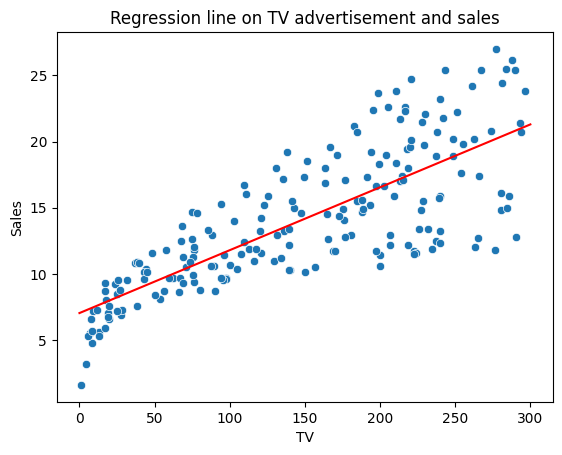

In [27]:
y_hat = lambda x: beta_0 + beta_1*x
# y_hat(1) # Om vi gör y hat av 1 så får man ett visst värde, man kan få andra värden om man ändrar på siffran

spending = np.linspace(0, 300)

ax = sns.scatterplot(data=df, x='TV', y='Sales')
sns.lineplot(x= spending, y=y_hat(spending), color="red")
ax.set(title = 'Regression line on TV advertisement and sales');

<AxesSubplot: xlabel='TV', ylabel='Sales'>

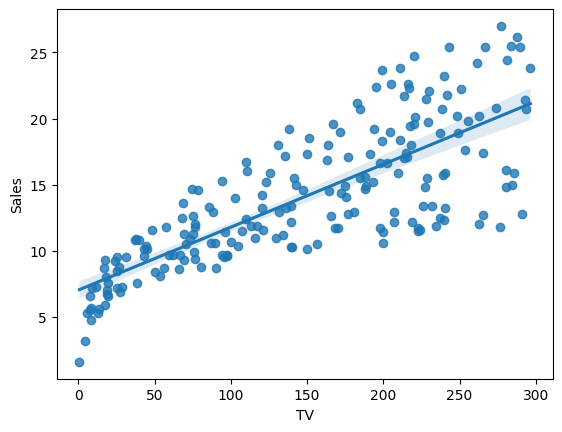

In [11]:
sns.regplot(x=X, y=y) # Vi får vår regressionsplot, det som är shaded konfidensintervallet

## Multiple linear regression
Vi vill använda alla våra features och predictors

In [12]:
X, y = df.drop('Sales', axis="columns"), df["Sales"]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [14]:
X.insert(0, 'Intercept', 1) # Lägger in 1:or(minns från teorin)

In [15]:
X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [16]:
# @ operator - matmul operator(kommer från numpy egentligen)
# in numpy - the matmul operator is operator overloaded to handle matrix multiplication

X.T@X  # Detta är operation xTx (i teorin normalekvationen) Vi har transponerat matrisen x. och matrismultiplicerat x då förväntar vi oss att vi får en kvadratisk-matris
# Nedanför så är den 4x4 nu.
# För att matrismultiplikationer ska fungera så måste dimensionerna stämma överens

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [17]:
beta_hat = np.linalg.inv(X.T@X)@X.T@y # Inverterat vår matris. Detta är normalekvationen (OLS)
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [18]:
regression_fit = lambda X,y: np.linalg.inv(X.T@X)@X.T@y  # Vi vill ha den som en funktion för att kunna återanvända formen
beta_hat = regression_fit(X, y)

beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [19]:
# En prediction är x * beta_hat
# dot product(skalärprodukt)

predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230, 38, 69] # detta är n sample som vi har hittat på, men skulle lika gärna kunna vara riktigt sample
y_hat = predict(test_sample, beta_hat)

print(f"With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales on {y_hat}k units")

With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales on 20.557311447161773k units


## Train|test split

In [20]:
train_fraction = int(len(df)*0.7)  # Någon viss % t ex 0.7
print(train_fraction)

train = df.sample(n=train_fraction, random_state=42, replace=False) #  Hypergeometrisk fördelning
train.head()

140


,TV,Radio,Newspaper,Sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [21]:
# vi vill droppa utifrån olika indices
test = df.drop(train.index)

# För att kontrollera att det stämmer det vi droppade
test.shape, train.shape

((60, 4), (140, 4))

In [22]:
X_train, y_train = train.drop("Sales", axis = "columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis = "columns"), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)


# Kontrollerar shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((140, 4), (140,), (60, 4), (60,))

## Prediction

In [23]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters:\n{beta_hat}")

# weights är också ett begrepp för beta
predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1))  # reshapar till en kolumn vektor för att kunna använda min x matris och multiplicera med den

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5] # prediktion för de första 5 värdena

Beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [24]:
X_test.iloc[1]

# Spending on $120.2k on TV, $19,6k on radio and $11,6 on newspaper gives prediction on 12.19k units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

## Evaluate model performance

In [25]:
m = len(y_test)

# removed extra dimension (60,1) -> (60,)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)


# Dessa skulle man kunna jämföra med tidigare modeller
mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726545, 3.540425618238493, 1.8816018755939028)